In [20]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [16]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
sampling_seed=0
size_4_training=2000
#img_size=224
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [19]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  


FileExistsError: [Errno 17] File exists: '../working/data/train_seg/idc-minus/'

In [23]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_test,class0sample_val,  class0label_test, class0label_val = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_test, class1sample_val, class1label_test, class1label_val = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [24]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [25]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (128,128), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    i=0
    for i in range(length):
        print(combined_label[i])

    print

    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(2800, 128, 128, 3)
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 

In [26]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [27]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [28]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [29]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [30]:
import matplotlib.pyplot as plt

### Normal

In [31]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [32]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [33]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [34]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [35]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [36]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [37]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [38]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [39]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [40]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [41]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [42]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-3), metrics = ['accuracy'])

  return model

# Custom Callback

In [45]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [46]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

# One Hot Encoding the labels

# ImageDataGenerator

In [47]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


train_datagen = ImageDataGenerator(rescale = 1/255)

val_datagen = ImageDataGenerator(rescale = 1/255)
val2_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = True)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [48]:
images, labels = train_generator.next()

100%|██████████| 3/3 [00:00<00:00, 247.89it/s]


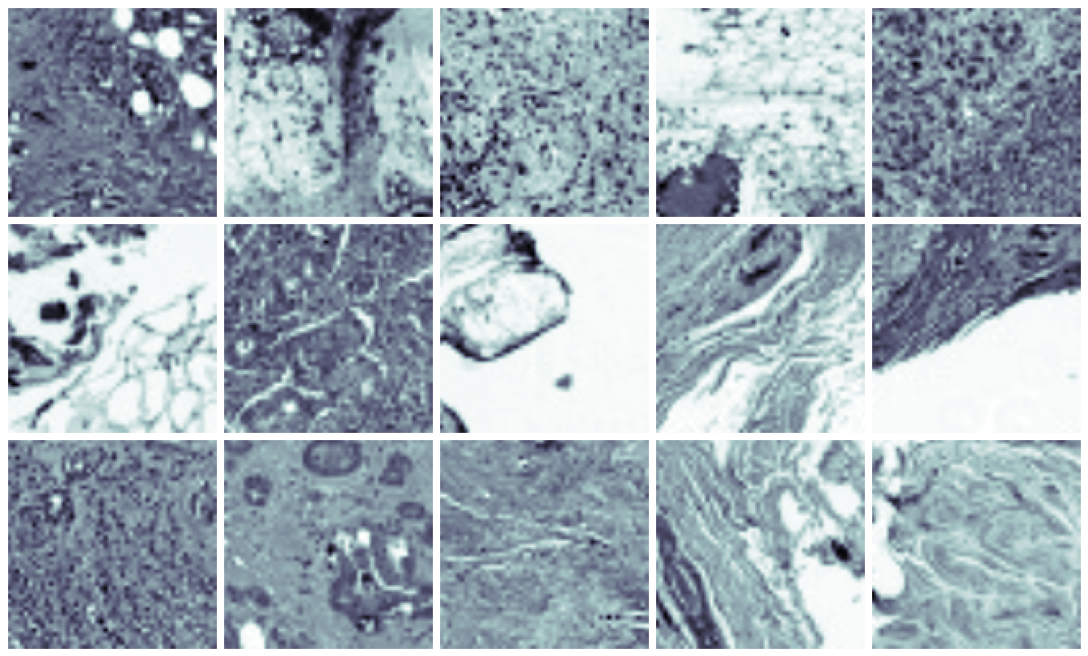

In [49]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [50]:
#os.mkdir('Model')
os.mkdir('./History')

In [51]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('./History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [52]:
model = Network128(input_shape = (128, 128, 3), nb_class = 2, depth = 5)
model.summary() 

2022-05-11 09:39:35.665791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 09:39:35.798435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 09:39:35.799176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 09:39:35.800379: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

2022-05-11 09:39:49.318367: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70


2022-05-11 09:40:03.925795: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


175/175 [==============================] - 122s 582ms/step - loss: 0.6156 - accuracy: 0.7250 - val_loss: 0.6931 - val_accuracy: 0.5024

Epoch 00001: val_accuracy improved from -inf to 0.50240, saving model to best_model_multiclass_128.h5
Predicting test data
53/53 [==============================] - 7s 91ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:07.320232


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       420
           1       0.00      0.00      0.00       420

    accuracy                           0.50       840
   macro avg       0.25      0.50      0.33       840
weighted avg       0.25      0.50      0.33       840

--------------------
| Confusion Matrix |
--------------------

 [[420   

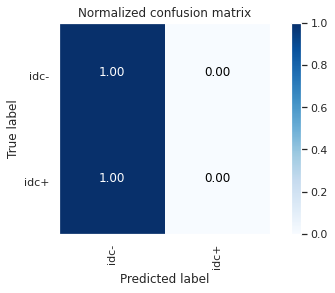

Epoch 2/70
175/175 [==============================] - 99s 567ms/step - loss: 0.5325 - accuracy: 0.7639 - val_loss: 0.8639 - val_accuracy: 0.4976

Epoch 00002: val_accuracy did not improve from 0.50240
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.718035


---------------------
| Balanced Accuracy  |
---------------------

    0.5


---------------------
|      Accuracy      |
---------------------

    0.5


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       420
           1       0.50      1.00      0.67       420

    accuracy                           0.50       840
   macro avg       0.25      0.50      0.33       840
weighted avg       0.25      0.50      0.33       840

--------------------
| Confusion Matrix |
--------------------

 [[  0 420]
 [  0 420]]


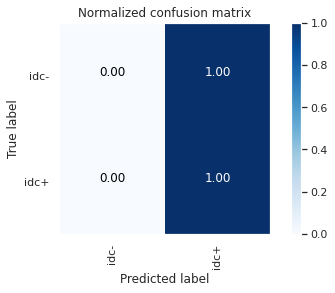

Epoch 3/70
175/175 [==============================] - 99s 567ms/step - loss: 0.4865 - accuracy: 0.7868 - val_loss: 0.6251 - val_accuracy: 0.6298

Epoch 00003: val_accuracy improved from 0.50240 to 0.62981, saving model to best_model_multiclass_128.h5
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.728869


---------------------
| Balanced Accuracy  |
---------------------

    0.6273809523809524


---------------------
|      Accuracy      |
---------------------

    0.6273809523809524


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.58      0.95      0.72       420
           1       0.86      0.30      0.45       420

    accuracy                           0.63       840
   macro avg       0.72      0.63      0.58       840
weighted avg       0.72      0.63      0.58       840

--------------------
| Confusi

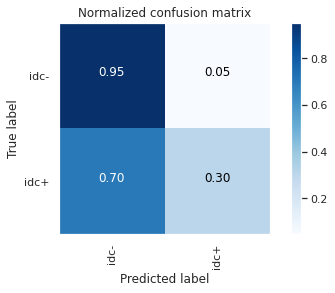

Epoch 4/70
175/175 [==============================] - 99s 567ms/step - loss: 0.4831 - accuracy: 0.7879 - val_loss: 0.6540 - val_accuracy: 0.6022

Epoch 00004: val_accuracy did not improve from 0.62981
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.727351


---------------------
| Balanced Accuracy  |
---------------------

    0.6023809523809524


---------------------
|      Accuracy      |
---------------------

    0.6023809523809524


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       420
           1       0.66      0.43      0.52       420

    accuracy                           0.60       840
   macro avg       0.62      0.60      0.59       840
weighted avg       0.62      0.60      0.59       840

--------------------
| Confusion Matrix |
--------------------

 [[326  94]
 [24

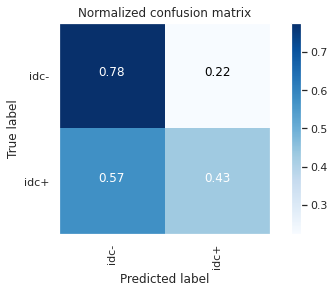

Epoch 5/70
175/175 [==============================] - 99s 567ms/step - loss: 0.4695 - accuracy: 0.7950 - val_loss: 0.5081 - val_accuracy: 0.7596

Epoch 00005: val_accuracy improved from 0.62981 to 0.75962, saving model to best_model_multiclass_128.h5
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.717052


---------------------
| Balanced Accuracy  |
---------------------

    0.7583333333333333


---------------------
|      Accuracy      |
---------------------

    0.7583333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       420
           1       0.70      0.90      0.79       420

    accuracy                           0.76       840
   macro avg       0.78      0.76      0.75       840
weighted avg       0.78      0.76      0.75       840

--------------------
| Confusi

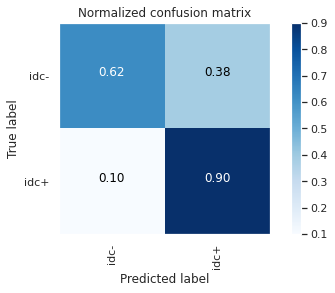

Epoch 6/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4579 - accuracy: 0.7986 - val_loss: 0.6172 - val_accuracy: 0.6575

Epoch 00006: val_accuracy did not improve from 0.75962
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.715180


---------------------
| Balanced Accuracy  |
---------------------

    0.655952380952381


---------------------
|      Accuracy      |
---------------------

    0.655952380952381


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.75      0.47      0.58       420
           1       0.61      0.84      0.71       420

    accuracy                           0.66       840
   macro avg       0.68      0.66      0.64       840
weighted avg       0.68      0.66      0.64       840

--------------------
| Confusion Matrix |
--------------------

 [[197 223]
 [ 66 

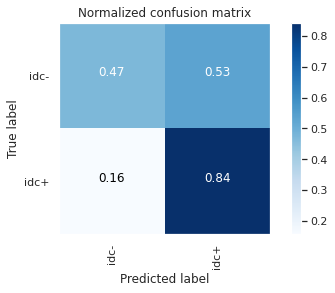

Epoch 7/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4537 - accuracy: 0.7961 - val_loss: 0.8036 - val_accuracy: 0.6226

Epoch 00007: val_accuracy did not improve from 0.75962
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.702102


---------------------
| Balanced Accuracy  |
---------------------

    0.6226190476190476


---------------------
|      Accuracy      |
---------------------

    0.6226190476190476


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.89      0.28      0.43       420
           1       0.57      0.96      0.72       420

    accuracy                           0.62       840
   macro avg       0.73      0.62      0.57       840
weighted avg       0.73      0.62      0.57       840

--------------------
| Confusion Matrix |
--------------------

 [[118 302]
 [ 1

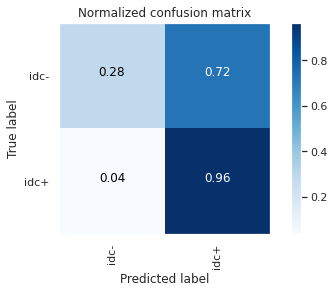

Epoch 8/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4383 - accuracy: 0.8061 - val_loss: 0.6053 - val_accuracy: 0.6803

Epoch 00008: val_accuracy did not improve from 0.75962
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.716342


---------------------
| Balanced Accuracy  |
---------------------

    0.6785714285714286


---------------------
|      Accuracy      |
---------------------

    0.6785714285714286


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       420
           1       0.64      0.81      0.72       420

    accuracy                           0.68       840
   macro avg       0.69      0.68      0.67       840
weighted avg       0.69      0.68      0.67       840

--------------------
| Confusion Matrix |
--------------------

 [[229 191]
 [ 7

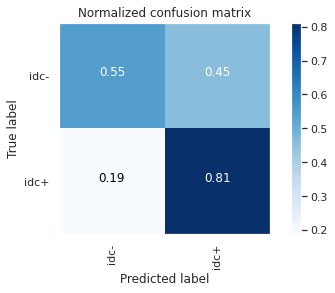

Epoch 9/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4490 - accuracy: 0.7993 - val_loss: 0.5494 - val_accuracy: 0.7200

Epoch 00009: val_accuracy did not improve from 0.75962
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.719336


---------------------
| Balanced Accuracy  |
---------------------

    0.719047619047619


---------------------
|      Accuracy      |
---------------------

    0.719047619047619


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       420
           1       0.69      0.80      0.74       420

    accuracy                           0.72       840
   macro avg       0.72      0.72      0.72       840
weighted avg       0.72      0.72      0.72       840

--------------------
| Confusion Matrix |
--------------------

 [[270 150]
 [ 86 

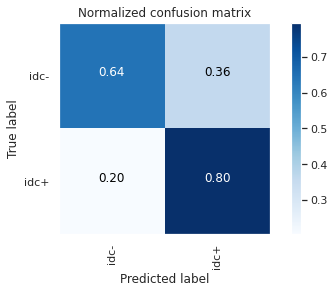

Epoch 10/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4459 - accuracy: 0.8071 - val_loss: 0.7399 - val_accuracy: 0.5589

Epoch 00010: val_accuracy did not improve from 0.75962
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.710196


---------------------
| Balanced Accuracy  |
---------------------

    0.5571428571428572


---------------------
|      Accuracy      |
---------------------

    0.5571428571428572


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       420
           1       0.56      0.57      0.56       420

    accuracy                           0.56       840
   macro avg       0.56      0.56      0.56       840
weighted avg       0.56      0.56      0.56       840

--------------------
| Confusion Matrix |
--------------------

 [[227 193]
 [1

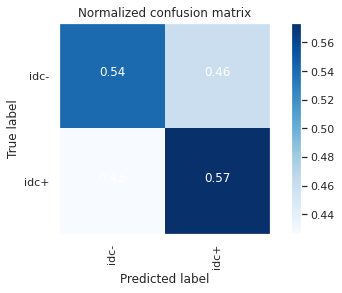

Epoch 11/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4195 - accuracy: 0.8129 - val_loss: 0.4494 - val_accuracy: 0.8305

Epoch 00011: val_accuracy improved from 0.75962 to 0.83053, saving model to best_model_multiclass_128.h5
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.706975


---------------------
| Balanced Accuracy  |
---------------------

    0.8285714285714285


---------------------
|      Accuracy      |
---------------------

    0.8285714285714286


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       420
           1       0.84      0.81      0.82       420

    accuracy                           0.83       840
   macro avg       0.83      0.83      0.83       840
weighted avg       0.83      0.83      0.83       840

--------------------
| Confus

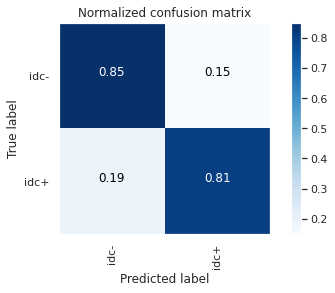

Epoch 12/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4271 - accuracy: 0.8129 - val_loss: 0.7022 - val_accuracy: 0.7560

Epoch 00012: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.704243


---------------------
| Balanced Accuracy  |
---------------------

    0.7523809523809524


---------------------
|      Accuracy      |
---------------------

    0.7523809523809524


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       420
           1       0.92      0.55      0.69       420

    accuracy                           0.75       840
   macro avg       0.80      0.75      0.74       840
weighted avg       0.80      0.75      0.74       840

--------------------
| Confusion Matrix |
--------------------

 [[399  21]
 [1

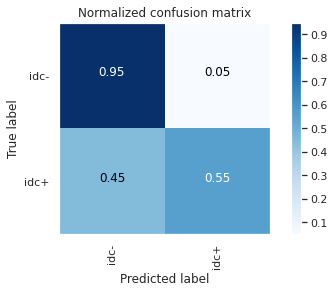

Epoch 13/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4246 - accuracy: 0.8146 - val_loss: 0.4556 - val_accuracy: 0.8161

Epoch 00013: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.702470


---------------------
| Balanced Accuracy  |
---------------------

    0.8142857142857143


---------------------
|      Accuracy      |
---------------------

    0.8142857142857143


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       420
           1       0.78      0.88      0.83       420

    accuracy                           0.81       840
   macro avg       0.82      0.81      0.81       840
weighted avg       0.82      0.81      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[316 104]
 [ 

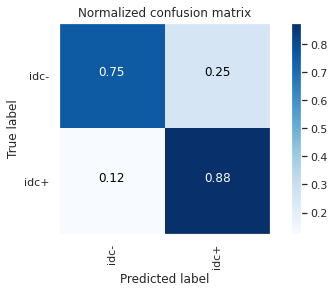

Epoch 14/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4247 - accuracy: 0.8168 - val_loss: 0.8840 - val_accuracy: 0.7692

Epoch 00014: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.715571


---------------------
| Balanced Accuracy  |
---------------------

    0.7654761904761904


---------------------
|      Accuracy      |
---------------------

    0.7654761904761904


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       420
           1       0.92      0.58      0.71       420

    accuracy                           0.77       840
   macro avg       0.81      0.77      0.76       840
weighted avg       0.81      0.77      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[398  22]
 [1

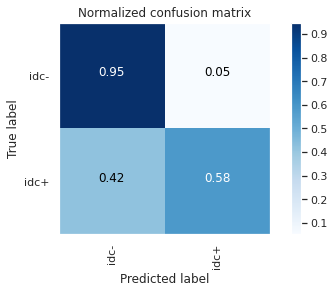

Epoch 15/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4137 - accuracy: 0.8229 - val_loss: 0.5645 - val_accuracy: 0.8173

Epoch 00015: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.707679


---------------------
| Balanced Accuracy  |
---------------------

    0.8154761904761905


---------------------
|      Accuracy      |
---------------------

    0.8154761904761905


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       420
           1       0.89      0.72      0.80       420

    accuracy                           0.82       840
   macro avg       0.83      0.82      0.81       840
weighted avg       0.83      0.82      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[381  39]
 [1

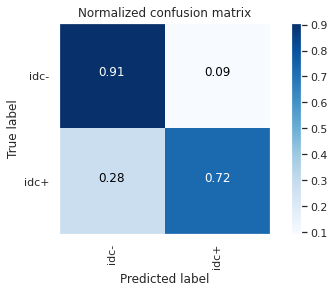

Epoch 16/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4059 - accuracy: 0.8204 - val_loss: 0.6308 - val_accuracy: 0.7007

Epoch 00016: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.744185


---------------------
| Balanced Accuracy  |
---------------------

    0.7011904761904761


---------------------
|      Accuracy      |
---------------------

    0.7011904761904761


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.51      0.63       420
           1       0.65      0.89      0.75       420

    accuracy                           0.70       840
   macro avg       0.74      0.70      0.69       840
weighted avg       0.74      0.70      0.69       840

--------------------
| Confusion Matrix |
--------------------

 [[214 206]
 [ 

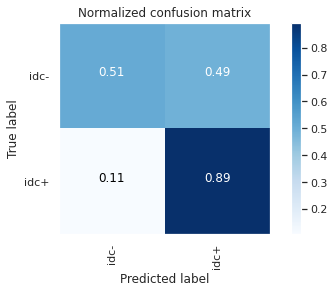

Epoch 17/70
175/175 [==============================] - 99s 566ms/step - loss: 0.4036 - accuracy: 0.8275 - val_loss: 0.3921 - val_accuracy: 0.8293

Epoch 00017: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.707643


---------------------
| Balanced Accuracy  |
---------------------

    0.8285714285714285


---------------------
|      Accuracy      |
---------------------

    0.8285714285714286


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       420
           1       0.85      0.79      0.82       420

    accuracy                           0.83       840
   macro avg       0.83      0.83      0.83       840
weighted avg       0.83      0.83      0.83       840

--------------------
| Confusion Matrix |
--------------------

 [[363  57]
 [ 

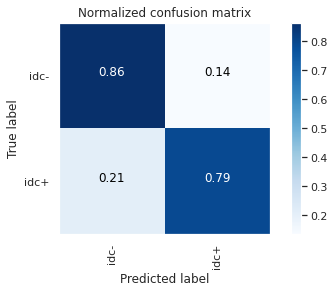

Epoch 18/70
175/175 [==============================] - 99s 566ms/step - loss: 0.3901 - accuracy: 0.8293 - val_loss: 0.4883 - val_accuracy: 0.8041

Epoch 00018: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.729150


---------------------
| Balanced Accuracy  |
---------------------

    0.8035714285714286


---------------------
|      Accuracy      |
---------------------

    0.8035714285714286


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       420
           1       0.87      0.72      0.78       420

    accuracy                           0.80       840
   macro avg       0.81      0.80      0.80       840
weighted avg       0.81      0.80      0.80       840

--------------------
| Confusion Matrix |
--------------------

 [[374  46]
 [1

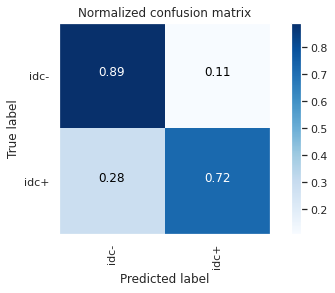

Epoch 19/70
175/175 [==============================] - 99s 566ms/step - loss: 0.3909 - accuracy: 0.8318 - val_loss: 0.7221 - val_accuracy: 0.6490

Epoch 00019: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.722006


---------------------
| Balanced Accuracy  |
---------------------

    0.6488095238095238


---------------------
|      Accuracy      |
---------------------

    0.6488095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.39      0.53       420
           1       0.60      0.91      0.72       420

    accuracy                           0.65       840
   macro avg       0.70      0.65      0.62       840
weighted avg       0.70      0.65      0.62       840

--------------------
| Confusion Matrix |
--------------------

 [[164 256]
 [ 

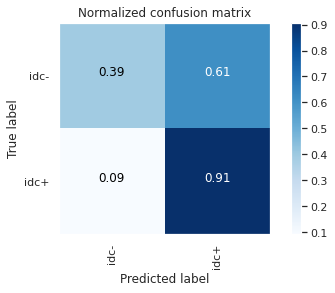

Epoch 20/70
175/175 [==============================] - 99s 566ms/step - loss: 0.3833 - accuracy: 0.8396 - val_loss: 0.5177 - val_accuracy: 0.8029

Epoch 00020: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.726447


---------------------
| Balanced Accuracy  |
---------------------

    0.8


---------------------
|      Accuracy      |
---------------------

    0.8


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       420
           1       0.89      0.68      0.77       420

    accuracy                           0.80       840
   macro avg       0.82      0.80      0.80       840
weighted avg       0.82      0.80      0.80       840

--------------------
| Confusion Matrix |
--------------------

 [[386  34]
 [134 286]]


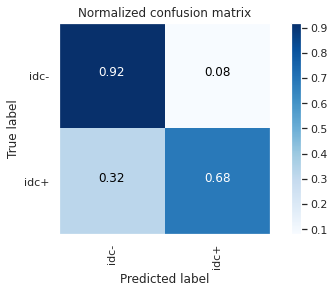

Epoch 21/70
175/175 [==============================] - 99s 566ms/step - loss: 0.3761 - accuracy: 0.8354 - val_loss: 0.9811 - val_accuracy: 0.7656

Epoch 00021: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.726982


---------------------
| Balanced Accuracy  |
---------------------

    0.763095238095238


---------------------
|      Accuracy      |
---------------------

    0.763095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       420
           1       0.93      0.57      0.71       420

    accuracy                           0.76       840
   macro avg       0.81      0.76      0.75       840
weighted avg       0.81      0.76      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[402  18]
 [181

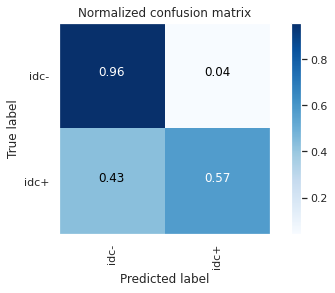

Epoch 22/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3732 - accuracy: 0.8389 - val_loss: 0.5480 - val_accuracy: 0.7945

Epoch 00022: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.758266


---------------------
| Balanced Accuracy  |
---------------------

    0.7916666666666667


---------------------
|      Accuracy      |
---------------------

    0.7916666666666666


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       420
           1       0.88      0.68      0.76       420

    accuracy                           0.79       840
   macro avg       0.81      0.79      0.79       840
weighted avg       0.81      0.79      0.79       840

--------------------
| Confusion Matrix |
--------------------

 [[381  39]
 [1

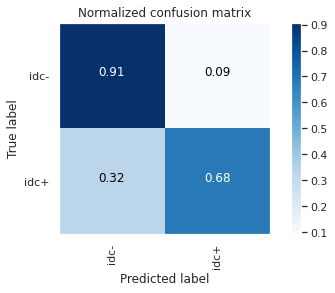

Epoch 23/70
175/175 [==============================] - 99s 565ms/step - loss: 0.3500 - accuracy: 0.8571 - val_loss: 0.4311 - val_accuracy: 0.8125

Epoch 00023: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.679235


---------------------
| Balanced Accuracy  |
---------------------

    0.8083333333333333


---------------------
|      Accuracy      |
---------------------

    0.8083333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       420
           1       0.80      0.82      0.81       420

    accuracy                           0.81       840
   macro avg       0.81      0.81      0.81       840
weighted avg       0.81      0.81      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[335  85]
 [ 

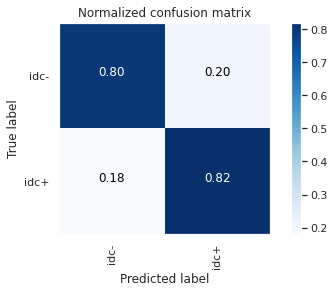

Epoch 24/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3655 - accuracy: 0.8421 - val_loss: 0.5177 - val_accuracy: 0.7668

Epoch 00024: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.699403


---------------------
| Balanced Accuracy  |
---------------------

    0.763095238095238


---------------------
|      Accuracy      |
---------------------

    0.763095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       420
           1       0.75      0.79      0.77       420

    accuracy                           0.76       840
   macro avg       0.76      0.76      0.76       840
weighted avg       0.76      0.76      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[311 109]
 [ 90

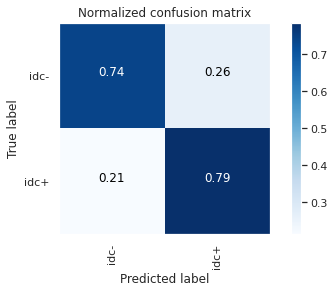

Epoch 25/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3611 - accuracy: 0.8425 - val_loss: 0.4467 - val_accuracy: 0.8233

Epoch 00025: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.687796


---------------------
| Balanced Accuracy  |
---------------------

    0.8214285714285714


---------------------
|      Accuracy      |
---------------------

    0.8214285714285714


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       420
           1       0.86      0.76      0.81       420

    accuracy                           0.82       840
   macro avg       0.83      0.82      0.82       840
weighted avg       0.83      0.82      0.82       840

--------------------
| Confusion Matrix |
--------------------

 [[369  51]
 [ 

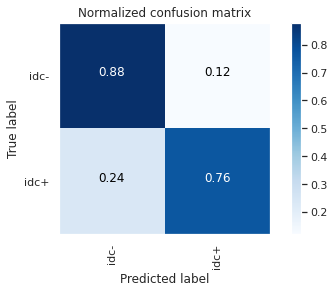

Epoch 26/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3726 - accuracy: 0.8329 - val_loss: 0.7789 - val_accuracy: 0.6118

Epoch 00026: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.711673


---------------------
| Balanced Accuracy  |
---------------------

    0.611904761904762


---------------------
|      Accuracy      |
---------------------

    0.611904761904762


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.27      0.41       420
           1       0.57      0.95      0.71       420

    accuracy                           0.61       840
   macro avg       0.71      0.61      0.56       840
weighted avg       0.71      0.61      0.56       840

--------------------
| Confusion Matrix |
--------------------

 [[115 305]
 [ 21

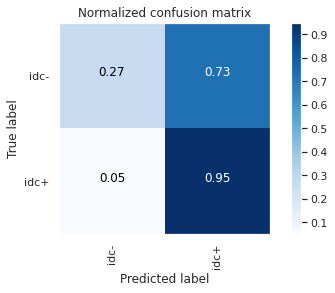

Epoch 27/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3551 - accuracy: 0.8561 - val_loss: 0.6761 - val_accuracy: 0.7620

Epoch 00027: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.712667


---------------------
| Balanced Accuracy  |
---------------------

    0.763095238095238


---------------------
|      Accuracy      |
---------------------

    0.763095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       420
           1       0.69      0.94      0.80       420

    accuracy                           0.76       840
   macro avg       0.80      0.76      0.76       840
weighted avg       0.80      0.76      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[247 173]
 [ 26

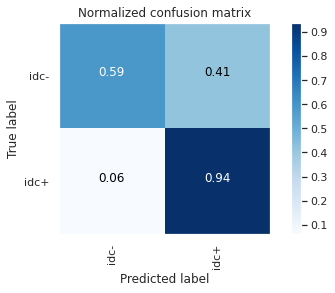

Epoch 28/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3512 - accuracy: 0.8446 - val_loss: 0.8250 - val_accuracy: 0.7404

Epoch 00028: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.682771


---------------------
| Balanced Accuracy  |
---------------------

    0.7392857142857143


---------------------
|      Accuracy      |
---------------------

    0.7392857142857143


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.57      0.69       420
           1       0.68      0.91      0.78       420

    accuracy                           0.74       840
   macro avg       0.77      0.74      0.73       840
weighted avg       0.77      0.74      0.73       840

--------------------
| Confusion Matrix |
--------------------

 [[240 180]
 [ 

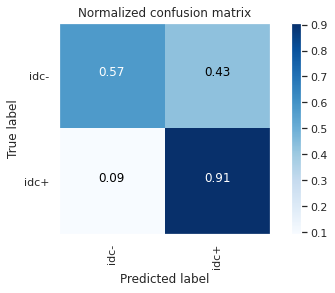

Epoch 29/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3325 - accuracy: 0.8579 - val_loss: 0.7685 - val_accuracy: 0.7993

Epoch 00029: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.689483


---------------------
| Balanced Accuracy  |
---------------------

    0.7952380952380953


---------------------
|      Accuracy      |
---------------------

    0.7952380952380952


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       420
           1       0.90      0.67      0.77       420

    accuracy                           0.80       840
   macro avg       0.82      0.80      0.79       840
weighted avg       0.82      0.80      0.79       840

--------------------
| Confusion Matrix |
--------------------

 [[388  32]
 [1

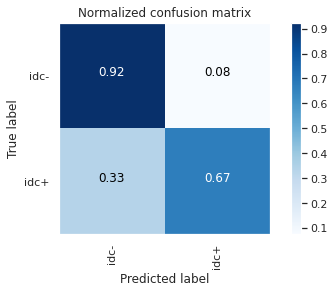

Epoch 30/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3243 - accuracy: 0.8636 - val_loss: 0.6051 - val_accuracy: 0.7812

Epoch 00030: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.699608


---------------------
| Balanced Accuracy  |
---------------------

    0.7797619047619048


---------------------
|      Accuracy      |
---------------------

    0.7797619047619048


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       420
           1       0.75      0.84      0.79       420

    accuracy                           0.78       840
   macro avg       0.78      0.78      0.78       840
weighted avg       0.78      0.78      0.78       840

--------------------
| Confusion Matrix |
--------------------

 [[302 118]
 [ 

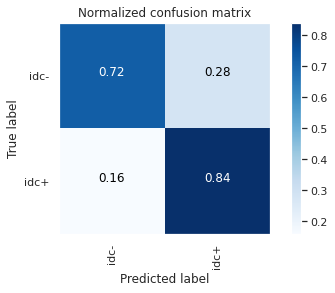

Epoch 31/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3096 - accuracy: 0.8711 - val_loss: 0.4669 - val_accuracy: 0.8149

Epoch 00031: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.712684


---------------------
| Balanced Accuracy  |
---------------------

    0.8130952380952381


---------------------
|      Accuracy      |
---------------------

    0.8130952380952381


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       420
           1       0.85      0.76      0.80       420

    accuracy                           0.81       840
   macro avg       0.82      0.81      0.81       840
weighted avg       0.82      0.81      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[362  58]
 [ 

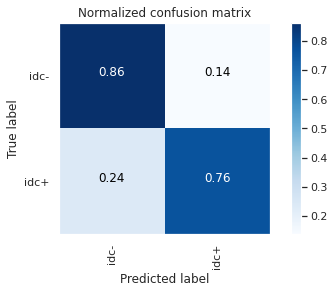

Epoch 32/70
175/175 [==============================] - 99s 564ms/step - loss: 0.3204 - accuracy: 0.8686 - val_loss: 0.4685 - val_accuracy: 0.8209

Epoch 00032: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.726023


---------------------
| Balanced Accuracy  |
---------------------

    0.819047619047619


---------------------
|      Accuracy      |
---------------------

    0.819047619047619


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       420
           1       0.82      0.81      0.82       420

    accuracy                           0.82       840
   macro avg       0.82      0.82      0.82       840
weighted avg       0.82      0.82      0.82       840

--------------------
| Confusion Matrix |
--------------------

 [[347  73]
 [ 79

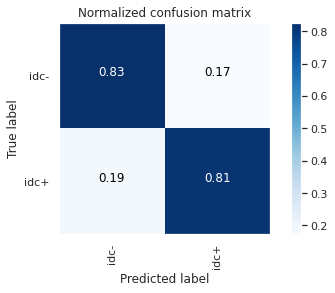

Epoch 33/70
175/175 [==============================] - 99s 565ms/step - loss: 0.2972 - accuracy: 0.8800 - val_loss: 0.5807 - val_accuracy: 0.7656

Epoch 00033: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.100357


---------------------
| Balanced Accuracy  |
---------------------

    0.763095238095238


---------------------
|      Accuracy      |
---------------------

    0.763095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.63      0.73       420
           1       0.71      0.90      0.79       420

    accuracy                           0.76       840
   macro avg       0.78      0.76      0.76       840
weighted avg       0.78      0.76      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[264 156]
 [ 43

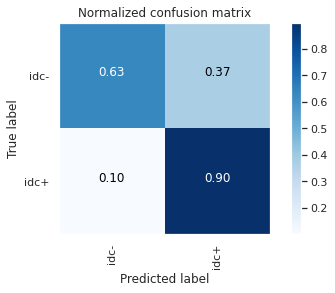

Epoch 34/70
175/175 [==============================] - 99s 566ms/step - loss: 0.2760 - accuracy: 0.8832 - val_loss: 0.5705 - val_accuracy: 0.7909

Epoch 00034: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.725048


---------------------
| Balanced Accuracy  |
---------------------

    0.7892857142857143


---------------------
|      Accuracy      |
---------------------

    0.7892857142857143


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       420
           1       0.85      0.70      0.77       420

    accuracy                           0.79       840
   macro avg       0.80      0.79      0.79       840
weighted avg       0.80      0.79      0.79       840

--------------------
| Confusion Matrix |
--------------------

 [[370  50]
 [1

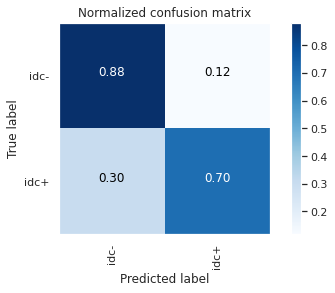

Epoch 35/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2779 - accuracy: 0.8864 - val_loss: 1.0748 - val_accuracy: 0.7584

Epoch 00035: val_accuracy did not improve from 0.83053
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.684334


---------------------
| Balanced Accuracy  |
---------------------

    0.7547619047619047


---------------------
|      Accuracy      |
---------------------

    0.7547619047619047


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.69      0.94      0.79       420
           1       0.91      0.57      0.70       420

    accuracy                           0.75       840
   macro avg       0.80      0.75      0.75       840
weighted avg       0.80      0.75      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[396  24]
 [1

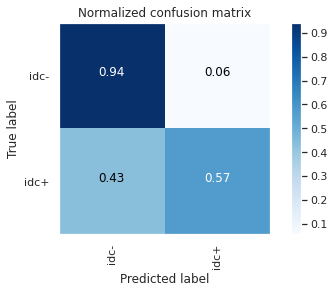

Epoch 36/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2665 - accuracy: 0.8975 - val_loss: 0.5056 - val_accuracy: 0.8365

Epoch 00036: val_accuracy improved from 0.83053 to 0.83654, saving model to best_model_multiclass_128.h5
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.683971


---------------------
| Balanced Accuracy  |
---------------------

    0.8357142857142856


---------------------
|      Accuracy      |
---------------------

    0.8357142857142857


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       420
           1       0.81      0.88      0.84       420

    accuracy                           0.84       840
   macro avg       0.84      0.84      0.84       840
weighted avg       0.84      0.84      0.84       840

--------------------
| Confus

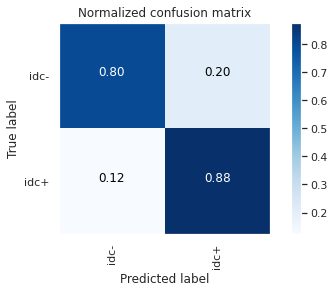

Epoch 37/70
175/175 [==============================] - 99s 566ms/step - loss: 0.2548 - accuracy: 0.8918 - val_loss: 0.9213 - val_accuracy: 0.7212

Epoch 00037: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.708738


---------------------
| Balanced Accuracy  |
---------------------

    0.7202380952380952


---------------------
|      Accuracy      |
---------------------

    0.7202380952380952


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.51      0.65       420
           1       0.66      0.93      0.77       420

    accuracy                           0.72       840
   macro avg       0.77      0.72      0.71       840
weighted avg       0.77      0.72      0.71       840

--------------------
| Confusion Matrix |
--------------------

 [[216 204]
 [ 

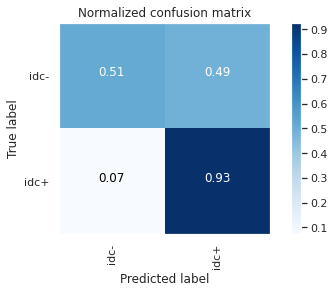

Epoch 38/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2580 - accuracy: 0.8932 - val_loss: 0.5356 - val_accuracy: 0.8041

Epoch 00038: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.687554


---------------------
| Balanced Accuracy  |
---------------------

    0.8


---------------------
|      Accuracy      |
---------------------

    0.8


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       420
           1       0.90      0.67      0.77       420

    accuracy                           0.80       840
   macro avg       0.82      0.80      0.80       840
weighted avg       0.82      0.80      0.80       840

--------------------
| Confusion Matrix |
--------------------

 [[389  31]
 [137 283]]


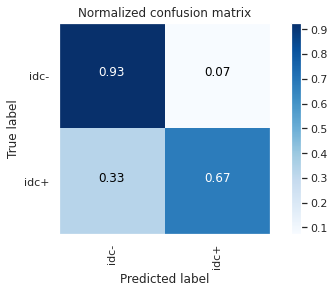

Epoch 39/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2460 - accuracy: 0.8993 - val_loss: 0.7366 - val_accuracy: 0.7464

Epoch 00039: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.677898


---------------------
| Balanced Accuracy  |
---------------------

    0.7428571428571429


---------------------
|      Accuracy      |
---------------------

    0.7428571428571429


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       420
           1       0.89      0.55      0.68       420

    accuracy                           0.74       840
   macro avg       0.78      0.74      0.73       840
weighted avg       0.78      0.74      0.73       840

--------------------
| Confusion Matrix |
--------------------

 [[391  29]
 [1

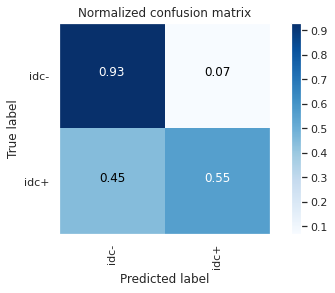

Epoch 40/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2403 - accuracy: 0.9057 - val_loss: 0.6787 - val_accuracy: 0.7656

Epoch 00040: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.696670


---------------------
| Balanced Accuracy  |
---------------------

    0.7642857142857142


---------------------
|      Accuracy      |
---------------------

    0.7642857142857142


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       420
           1       0.79      0.72      0.75       420

    accuracy                           0.76       840
   macro avg       0.77      0.76      0.76       840
weighted avg       0.77      0.76      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[341  79]
 [1

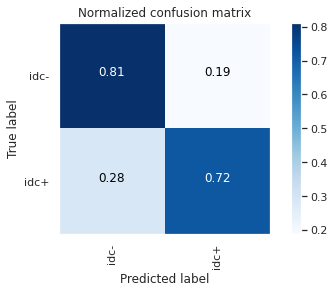

Epoch 41/70
175/175 [==============================] - 99s 564ms/step - loss: 0.2190 - accuracy: 0.9146 - val_loss: 0.8732 - val_accuracy: 0.7440

Epoch 00041: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.702053


---------------------
| Balanced Accuracy  |
---------------------

    0.7404761904761905


---------------------
|      Accuracy      |
---------------------

    0.7404761904761905


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       420
           1       0.88      0.55      0.68       420

    accuracy                           0.74       840
   macro avg       0.78      0.74      0.73       840
weighted avg       0.78      0.74      0.73       840

--------------------
| Confusion Matrix |
--------------------

 [[389  31]
 [1

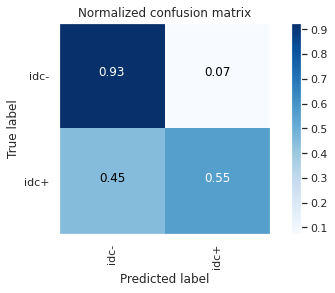

Epoch 42/70
175/175 [==============================] - 99s 565ms/step - loss: 0.2167 - accuracy: 0.9154 - val_loss: 1.5869 - val_accuracy: 0.7248

Epoch 00042: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.706980


---------------------
| Balanced Accuracy  |
---------------------

    0.7202380952380952


---------------------
|      Accuracy      |
---------------------

    0.7202380952380952


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       420
           1       0.94      0.47      0.63       420

    accuracy                           0.72       840
   macro avg       0.79      0.72      0.70       840
weighted avg       0.79      0.72      0.70       840

--------------------
| Confusion Matrix |
--------------------

 [[408  12]
 [2

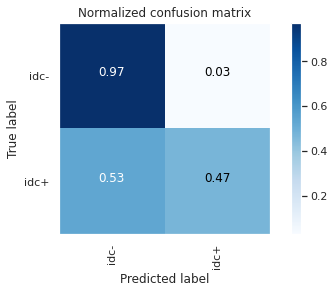

Epoch 43/70
175/175 [==============================] - 99s 565ms/step - loss: 0.1824 - accuracy: 0.9296 - val_loss: 0.6736 - val_accuracy: 0.7608

Epoch 00043: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.706516


---------------------
| Balanced Accuracy  |
---------------------

    0.7583333333333333


---------------------
|      Accuracy      |
---------------------

    0.7583333333333333


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       420
           1       0.87      0.60      0.71       420

    accuracy                           0.76       840
   macro avg       0.79      0.76      0.75       840
weighted avg       0.79      0.76      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[383  37]
 [1

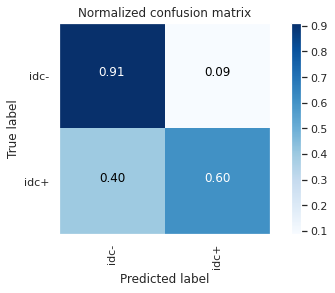

Epoch 44/70
175/175 [==============================] - 99s 566ms/step - loss: 0.1937 - accuracy: 0.9204 - val_loss: 0.6894 - val_accuracy: 0.8089

Epoch 00044: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.688398


---------------------
| Balanced Accuracy  |
---------------------

    0.8071428571428572


---------------------
|      Accuracy      |
---------------------

    0.8071428571428572


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       420
           1       0.88      0.72      0.79       420

    accuracy                           0.81       840
   macro avg       0.82      0.81      0.81       840
weighted avg       0.82      0.81      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[377  43]
 [1

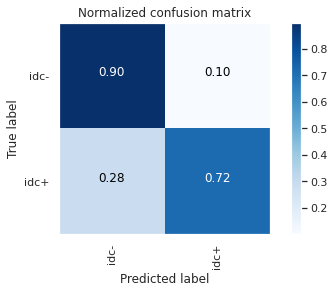

Epoch 45/70
175/175 [==============================] - 99s 565ms/step - loss: 0.1752 - accuracy: 0.9350 - val_loss: 0.5967 - val_accuracy: 0.8005

Epoch 00045: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.697888


---------------------
| Balanced Accuracy  |
---------------------

    0.7988095238095239


---------------------
|      Accuracy      |
---------------------

    0.7988095238095239


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       420
           1       0.79      0.81      0.80       420

    accuracy                           0.80       840
   macro avg       0.80      0.80      0.80       840
weighted avg       0.80      0.80      0.80       840

--------------------
| Confusion Matrix |
--------------------

 [[331  89]
 [ 

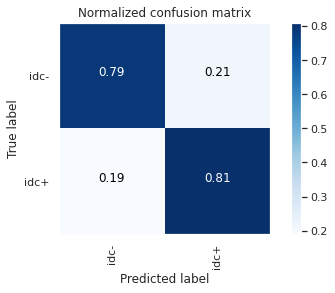

Epoch 46/70
175/175 [==============================] - 99s 565ms/step - loss: 0.1748 - accuracy: 0.9286 - val_loss: 1.4574 - val_accuracy: 0.6803

Epoch 00046: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.696622


---------------------
| Balanced Accuracy  |
---------------------

    0.6761904761904762


---------------------
|      Accuracy      |
---------------------

    0.6761904761904762


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.61      0.96      0.75       420
           1       0.90      0.40      0.55       420

    accuracy                           0.68       840
   macro avg       0.76      0.68      0.65       840
weighted avg       0.76      0.68      0.65       840

--------------------
| Confusion Matrix |
--------------------

 [[402  18]
 [2

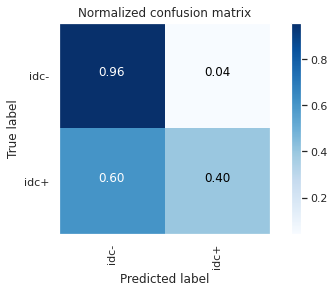

Epoch 47/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1661 - accuracy: 0.9343 - val_loss: 0.5243 - val_accuracy: 0.8197

Epoch 00047: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.672240


---------------------
| Balanced Accuracy  |
---------------------

    0.8178571428571428


---------------------
|      Accuracy      |
---------------------

    0.8178571428571428


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       420
           1       0.82      0.81      0.82       420

    accuracy                           0.82       840
   macro avg       0.82      0.82      0.82       840
weighted avg       0.82      0.82      0.82       840

--------------------
| Confusion Matrix |
--------------------

 [[346  74]
 [ 

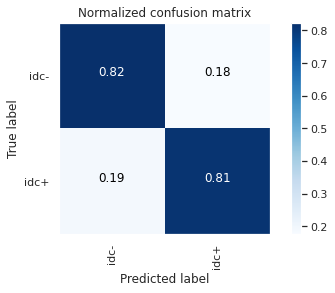

Epoch 48/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1577 - accuracy: 0.9400 - val_loss: 1.1368 - val_accuracy: 0.7284

Epoch 00048: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.709313


---------------------
| Balanced Accuracy  |
---------------------

    0.7238095238095239


---------------------
|      Accuracy      |
---------------------

    0.7238095238095238


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       420
           1       0.88      0.52      0.65       420

    accuracy                           0.72       840
   macro avg       0.77      0.72      0.71       840
weighted avg       0.77      0.72      0.71       840

--------------------
| Confusion Matrix |
--------------------

 [[391  29]
 [2

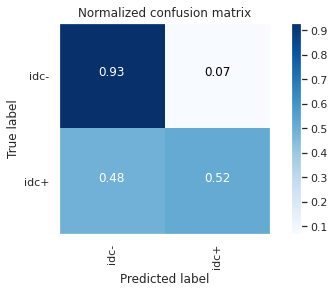

Epoch 49/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1648 - accuracy: 0.9343 - val_loss: 0.8501 - val_accuracy: 0.7091

Epoch 00049: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.681539


---------------------
| Balanced Accuracy  |
---------------------

    0.7059523809523809


---------------------
|      Accuracy      |
---------------------

    0.705952380952381


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       420
           1       0.82      0.53      0.64       420

    accuracy                           0.71       840
   macro avg       0.74      0.71      0.70       840
weighted avg       0.74      0.71      0.70       840

--------------------
| Confusion Matrix |
--------------------

 [[372  48]
 [19

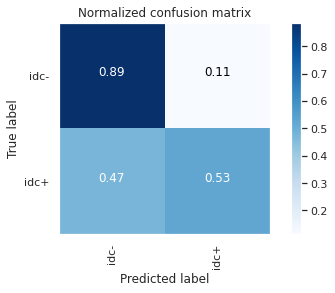

Epoch 50/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1451 - accuracy: 0.9468 - val_loss: 0.6784 - val_accuracy: 0.7764

Epoch 00050: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.706405


---------------------
| Balanced Accuracy  |
---------------------

    0.7749999999999999


---------------------
|      Accuracy      |
---------------------

    0.775


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       420
           1       0.83      0.70      0.76       420

    accuracy                           0.78       840
   macro avg       0.78      0.77      0.77       840
weighted avg       0.78      0.78      0.77       840

--------------------
| Confusion Matrix |
--------------------

 [[358  62]
 [127 293]]


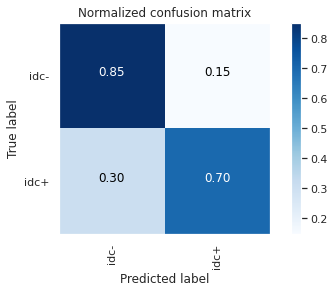

Epoch 51/70
175/175 [==============================] - 99s 563ms/step - loss: 0.1357 - accuracy: 0.9496 - val_loss: 0.5127 - val_accuracy: 0.8125

Epoch 00051: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.673672


---------------------
| Balanced Accuracy  |
---------------------

    0.8095238095238095


---------------------
|      Accuracy      |
---------------------

    0.8095238095238095


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       420
           1       0.82      0.80      0.81       420

    accuracy                           0.81       840
   macro avg       0.81      0.81      0.81       840
weighted avg       0.81      0.81      0.81       840

--------------------
| Confusion Matrix |
--------------------

 [[346  74]
 [ 

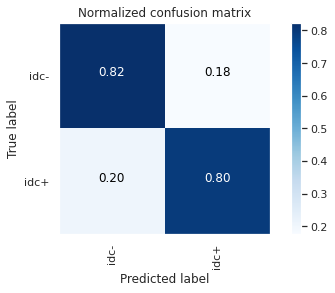

Epoch 52/70
175/175 [==============================] - 99s 563ms/step - loss: 0.1198 - accuracy: 0.9600 - val_loss: 1.3541 - val_accuracy: 0.7464

Epoch 00052: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.144013


---------------------
| Balanced Accuracy  |
---------------------

    0.7440476190476191


---------------------
|      Accuracy      |
---------------------

    0.7440476190476191


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.67      0.94      0.79       420
           1       0.91      0.55      0.68       420

    accuracy                           0.74       840
   macro avg       0.79      0.74      0.73       840
weighted avg       0.79      0.74      0.73       840

--------------------
| Confusion Matrix |
--------------------

 [[396  24]
 [1

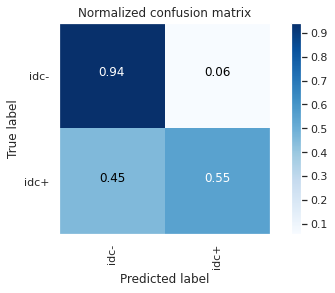

Epoch 53/70
175/175 [==============================] - 99s 563ms/step - loss: 0.1263 - accuracy: 0.9546 - val_loss: 3.8100 - val_accuracy: 0.6755

Epoch 00053: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.702039


---------------------
| Balanced Accuracy  |
---------------------

    0.6714285714285715


---------------------
|      Accuracy      |
---------------------

    0.6714285714285714


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       420
           1       0.93      0.37      0.53       420

    accuracy                           0.67       840
   macro avg       0.77      0.67      0.64       840
weighted avg       0.77      0.67      0.64       840

--------------------
| Confusion Matrix |
--------------------

 [[409  11]
 [2

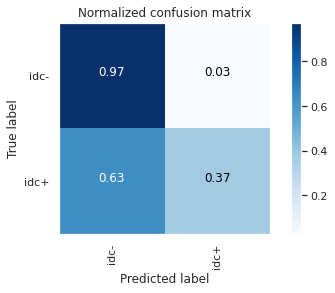

Epoch 54/70
175/175 [==============================] - 99s 563ms/step - loss: 0.1126 - accuracy: 0.9571 - val_loss: 0.8654 - val_accuracy: 0.7644

Epoch 00054: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.677910


---------------------
| Balanced Accuracy  |
---------------------

    0.7607142857142857


---------------------
|      Accuracy      |
---------------------

    0.7607142857142857


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.69      0.93      0.80       420
           1       0.90      0.59      0.71       420

    accuracy                           0.76       840
   macro avg       0.79      0.76      0.75       840
weighted avg       0.79      0.76      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[391  29]
 [1

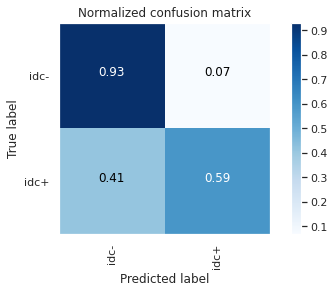

Epoch 55/70
175/175 [==============================] - 99s 563ms/step - loss: 0.1043 - accuracy: 0.9593 - val_loss: 0.8729 - val_accuracy: 0.7897

Epoch 00055: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.702739


---------------------
| Balanced Accuracy  |
---------------------

    0.7857142857142857


---------------------
|      Accuracy      |
---------------------

    0.7857142857142857


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       420
           1       0.87      0.67      0.76       420

    accuracy                           0.79       840
   macro avg       0.80      0.79      0.78       840
weighted avg       0.80      0.79      0.78       840

--------------------
| Confusion Matrix |
--------------------

 [[379  41]
 [1

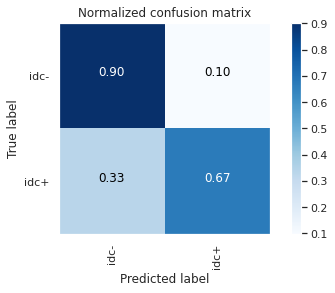

Epoch 56/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1157 - accuracy: 0.9568 - val_loss: 0.9447 - val_accuracy: 0.7043

Epoch 00056: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.683508


---------------------
| Balanced Accuracy  |
---------------------

    0.7011904761904761


---------------------
|      Accuracy      |
---------------------

    0.7011904761904761


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       420
           1       0.81      0.53      0.64       420

    accuracy                           0.70       840
   macro avg       0.73      0.70      0.69       840
weighted avg       0.73      0.70      0.69       840

--------------------
| Confusion Matrix |
--------------------

 [[367  53]
 [1

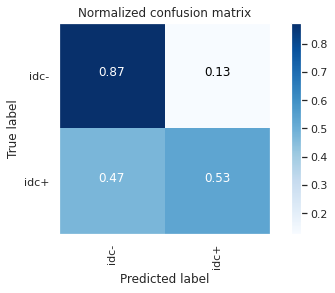

Epoch 57/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1157 - accuracy: 0.9611 - val_loss: 0.7713 - val_accuracy: 0.7212

Epoch 00057: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.690912


---------------------
| Balanced Accuracy  |
---------------------

    0.719047619047619


---------------------
|      Accuracy      |
---------------------

    0.719047619047619


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.83      0.55      0.66       420
           1       0.66      0.88      0.76       420

    accuracy                           0.72       840
   macro avg       0.75      0.72      0.71       840
weighted avg       0.75      0.72      0.71       840

--------------------
| Confusion Matrix |
--------------------

 [[233 187]
 [ 49

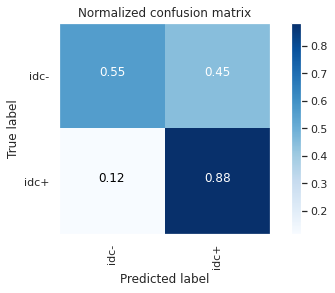

Epoch 58/70
175/175 [==============================] - 99s 564ms/step - loss: 0.0996 - accuracy: 0.9654 - val_loss: 2.1270 - val_accuracy: 0.6010

Epoch 00058: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.676715


---------------------
| Balanced Accuracy  |
---------------------

    0.5976190476190476


---------------------
|      Accuracy      |
---------------------

    0.5976190476190476


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       420
           1       0.91      0.22      0.35       420

    accuracy                           0.60       840
   macro avg       0.73      0.60      0.53       840
weighted avg       0.73      0.60      0.53       840

--------------------
| Confusion Matrix |
--------------------

 [[411   9]
 [3

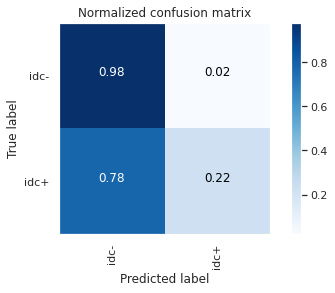

Epoch 59/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1078 - accuracy: 0.9629 - val_loss: 2.0811 - val_accuracy: 0.6803

Epoch 00059: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.700393


---------------------
| Balanced Accuracy  |
---------------------

    0.6773809523809524


---------------------
|      Accuracy      |
---------------------

    0.6773809523809524


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       420
           1       0.93      0.38      0.54       420

    accuracy                           0.68       840
   macro avg       0.77      0.68      0.65       840
weighted avg       0.77      0.68      0.65       840

--------------------
| Confusion Matrix |
--------------------

 [[408  12]
 [2

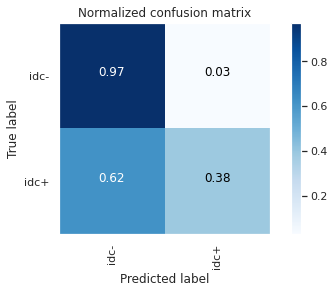

Epoch 60/70
175/175 [==============================] - 99s 564ms/step - loss: 0.1103 - accuracy: 0.9593 - val_loss: 0.7346 - val_accuracy: 0.7656

Epoch 00060: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.694784


---------------------
| Balanced Accuracy  |
---------------------

    0.7642857142857142


---------------------
|      Accuracy      |
---------------------

    0.7642857142857142


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       420
           1       0.73      0.85      0.78       420

    accuracy                           0.76       840
   macro avg       0.77      0.76      0.76       840
weighted avg       0.77      0.76      0.76       840

--------------------
| Confusion Matrix |
--------------------

 [[287 133]
 [ 

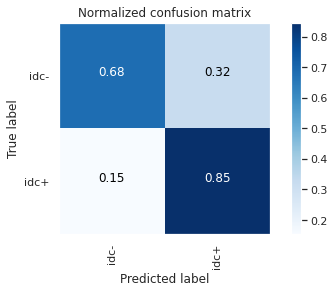

Epoch 61/70
175/175 [==============================] - 99s 564ms/step - loss: 0.0865 - accuracy: 0.9696 - val_loss: 0.9506 - val_accuracy: 0.7740

Epoch 00061: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.687756


---------------------
| Balanced Accuracy  |
---------------------

    0.7714285714285714


---------------------
|      Accuracy      |
---------------------

    0.7714285714285715


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       420
           1       0.79      0.73      0.76       420

    accuracy                           0.77       840
   macro avg       0.77      0.77      0.77       840
weighted avg       0.77      0.77      0.77       840

--------------------
| Confusion Matrix |
--------------------

 [[340  80]
 [1

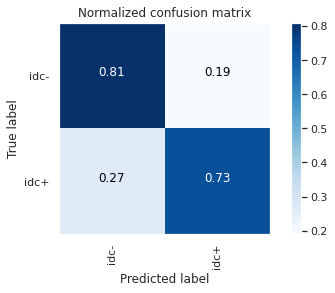

Epoch 62/70
175/175 [==============================] - 99s 565ms/step - loss: 0.1045 - accuracy: 0.9625 - val_loss: 0.8721 - val_accuracy: 0.7452

Epoch 00062: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.687984


---------------------
| Balanced Accuracy  |
---------------------

    0.7440476190476191


---------------------
|      Accuracy      |
---------------------

    0.7440476190476191


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       420
           1       0.73      0.78      0.75       420

    accuracy                           0.74       840
   macro avg       0.75      0.74      0.74       840
weighted avg       0.75      0.74      0.74       840

--------------------
| Confusion Matrix |
--------------------

 [[299 121]
 [ 

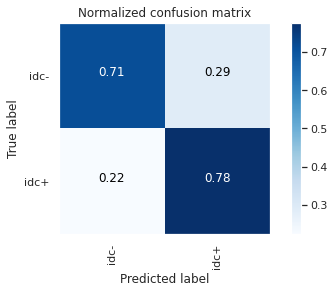

Epoch 63/70
175/175 [==============================] - 99s 565ms/step - loss: 0.0966 - accuracy: 0.9657 - val_loss: 1.2993 - val_accuracy: 0.7224

Epoch 00063: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.706301


---------------------
| Balanced Accuracy  |
---------------------

    0.719047619047619


---------------------
|      Accuracy      |
---------------------

    0.719047619047619


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       420
           1       0.87      0.52      0.65       420

    accuracy                           0.72       840
   macro avg       0.76      0.72      0.71       840
weighted avg       0.76      0.72      0.71       840

--------------------
| Confusion Matrix |
--------------------

 [[387  33]
 [203

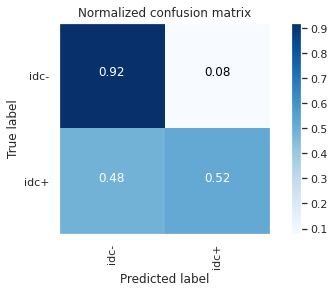

Epoch 64/70
175/175 [==============================] - 99s 566ms/step - loss: 0.0682 - accuracy: 0.9761 - val_loss: 0.9197 - val_accuracy: 0.7716

Epoch 00064: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.718286


---------------------
| Balanced Accuracy  |
---------------------

    0.7714285714285714


---------------------
|      Accuracy      |
---------------------

    0.7714285714285715


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       420
           1       0.75      0.81      0.78       420

    accuracy                           0.77       840
   macro avg       0.77      0.77      0.77       840
weighted avg       0.77      0.77      0.77       840

--------------------
| Confusion Matrix |
--------------------

 [[307 113]
 [ 

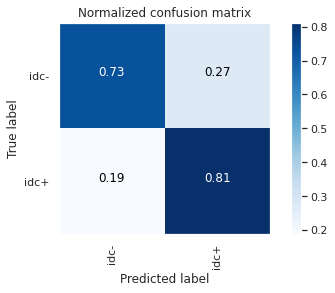

Epoch 65/70
175/175 [==============================] - 99s 565ms/step - loss: 0.0990 - accuracy: 0.9611 - val_loss: 1.5968 - val_accuracy: 0.7596

Epoch 00065: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.715770


---------------------
| Balanced Accuracy  |
---------------------

    0.7571428571428571


---------------------
|      Accuracy      |
---------------------

    0.7571428571428571


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.69      0.95      0.80       420
           1       0.91      0.57      0.70       420

    accuracy                           0.76       840
   macro avg       0.80      0.76      0.75       840
weighted avg       0.80      0.76      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[397  23]
 [1

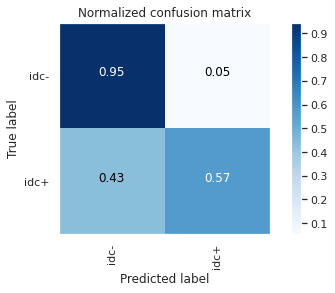

Epoch 66/70
175/175 [==============================] - 99s 566ms/step - loss: 0.0814 - accuracy: 0.9725 - val_loss: 0.7722 - val_accuracy: 0.7945

Epoch 00066: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:05.187847


---------------------
| Balanced Accuracy  |
---------------------

    0.7916666666666667


---------------------
|      Accuracy      |
---------------------

    0.7916666666666666


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       420
           1       0.90      0.66      0.76       420

    accuracy                           0.79       840
   macro avg       0.81      0.79      0.79       840
weighted avg       0.81      0.79      0.79       840

--------------------
| Confusion Matrix |
--------------------

 [[389  31]
 [1

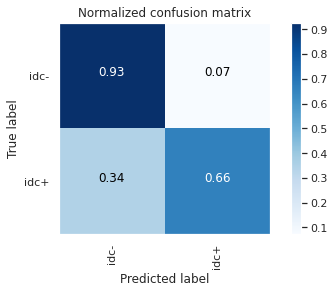

Epoch 67/70
175/175 [==============================] - 99s 566ms/step - loss: 0.0680 - accuracy: 0.9764 - val_loss: 1.6124 - val_accuracy: 0.6538

Epoch 00067: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.709268


---------------------
| Balanced Accuracy  |
---------------------

    0.655952380952381


---------------------
|      Accuracy      |
---------------------

    0.655952380952381


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.38      0.53       420
           1       0.60      0.93      0.73       420

    accuracy                           0.66       840
   macro avg       0.72      0.66      0.63       840
weighted avg       0.72      0.66      0.63       840

--------------------
| Confusion Matrix |
--------------------

 [[161 259]
 [ 30

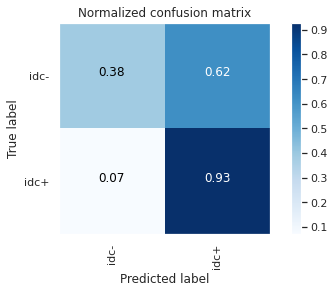

Epoch 68/70
175/175 [==============================] - 99s 566ms/step - loss: 0.1008 - accuracy: 0.9639 - val_loss: 1.2180 - val_accuracy: 0.7416

Epoch 00068: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.710048


---------------------
| Balanced Accuracy  |
---------------------

    0.7404761904761905


---------------------
|      Accuracy      |
---------------------

    0.7404761904761905


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       420
           1       0.92      0.52      0.67       420

    accuracy                           0.74       840
   macro avg       0.80      0.74      0.73       840
weighted avg       0.80      0.74      0.73       840

--------------------
| Confusion Matrix |
--------------------

 [[402  18]
 [2

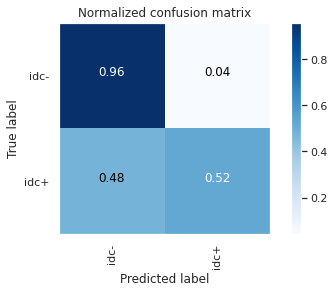

Epoch 69/70
175/175 [==============================] - 99s 565ms/step - loss: 0.0908 - accuracy: 0.9696 - val_loss: 0.9459 - val_accuracy: 0.7548

Epoch 00069: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.713245


---------------------
| Balanced Accuracy  |
---------------------

    0.7535714285714286


---------------------
|      Accuracy      |
---------------------

    0.7535714285714286


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.62      0.72       420
           1       0.70      0.89      0.78       420

    accuracy                           0.75       840
   macro avg       0.77      0.75      0.75       840
weighted avg       0.77      0.75      0.75       840

--------------------
| Confusion Matrix |
--------------------

 [[261 159]
 [ 

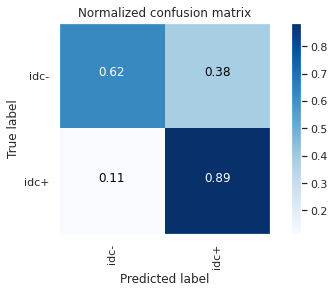

Epoch 70/70
175/175 [==============================] - 99s 565ms/step - loss: 0.0692 - accuracy: 0.9768 - val_loss: 1.7797 - val_accuracy: 0.6310

Epoch 00070: val_accuracy did not improve from 0.83654
Predicting test data
53/53 [==============================] - 5s 89ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.716658


---------------------
| Balanced Accuracy  |
---------------------

    0.6297619047619047


---------------------
|      Accuracy      |
---------------------

    0.6297619047619047


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.58      0.92      0.71       420
           1       0.80      0.34      0.48       420

    accuracy                           0.63       840
   macro avg       0.69      0.63      0.60       840
weighted avg       0.69      0.63      0.60       840

--------------------
| Confusion Matrix |
--------------------

 [[385  35]
 [2

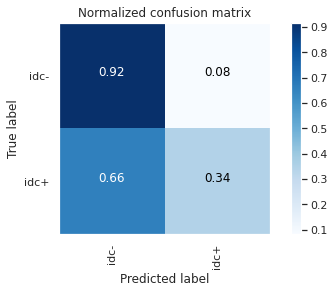

In [54]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [55]:
from keras.models import load_model
best_model = load_model('./best_model_multiclass_128.h5')

# Best Model Performance

Predicting test data
53/53 [==============================] - 7s 88ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:07.132790


---------------------
| Balanced Accuracy  |
---------------------

    0.8357142857142856


---------------------
|      Accuracy      |
---------------------

    0.8357142857142857


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       420
           1       0.81      0.88      0.84       420

    accuracy                           0.84       840
   macro avg       0.84      0.84      0.84       840
weighted avg       0.84      0.84      0.84       840

--------------------
| Confusion Matrix |
--------------------

 [[334  86]
 [ 52 368]]


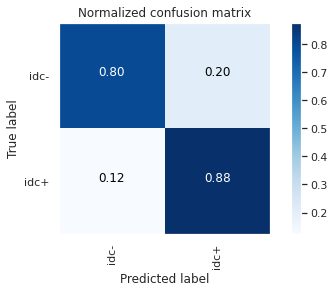

In [56]:
'''
test_model(best_model, 
           val_generator,
           y_test = np.argmax(test_label, axis = 1),
           class_labels = ['Normal', 'Viral', 'Bacterial'])
           '''
test_model(best_model, 
           val_generator,
           np.argmax(test_label, axis=1),
           class_labels = ['idc-', 'idc+'])

# Plotting EpochPlot

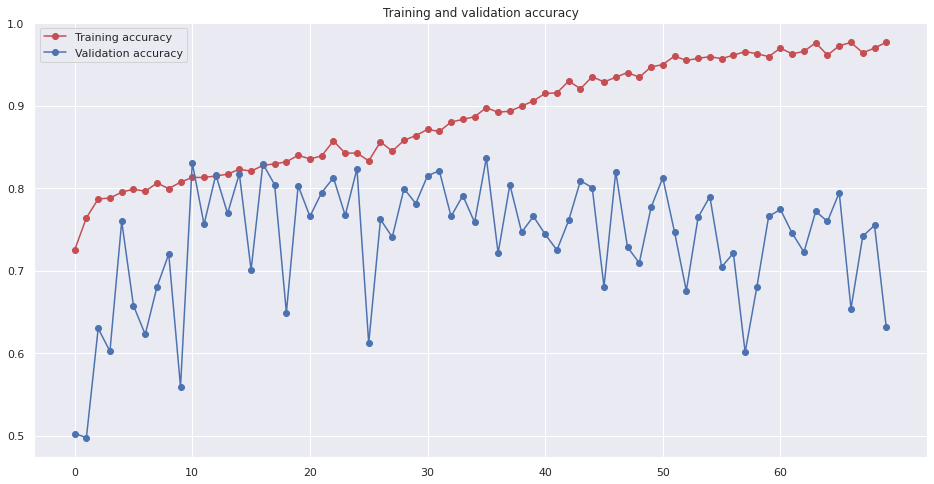

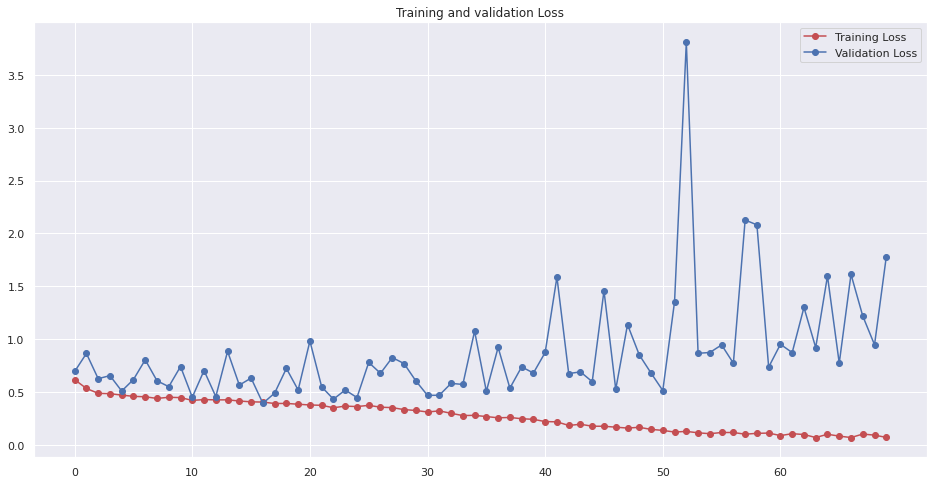

<Figure size 432x288 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....